In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_excel('resultat_DPO_summarization.xlsx')
df.head(10)

,Model,Keep,Beta,Temperature,Win rate,Avg KL,Time spent,Notes,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DPO,No,0.1,0.25,0.50,0.3809,55,NaN,NaN,0.3809,NaN,NaN,NaN,NaN,NaN
1,DPO,No,0.1,1.00,0.48,0.0140,57,NaN,NaN,0.0140,NaN,NaN,NaN,NaN,NaN
2,DPO,No,0.1,0.75,0.48,1.0331,48 min,NaN,NaN,1.0331,NaN,NaN,NaN,NaN,NaN
3,DPO,No,0.1,0.25,0.54,1.0280,58 min,NaN,NaN,1.0280,NaN,NaN,NaN,NaN,NaN
4,DPO,No,0.1,0.75,0.40,0.3830,1h10,NaN,NaN,0.3830,NaN,NaN,NaN,NaN,NaN
5,SFT,No,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SFT,No,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SFT,No,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SFT,No,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SFT,No,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


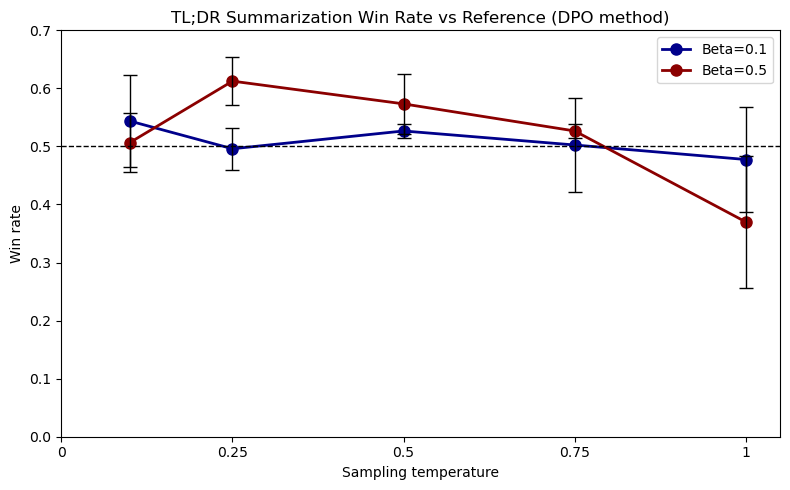

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter, MultipleLocator

df = pd.read_excel('resultat_DPO_summarization.xlsx')
df_plot = df.dropna(subset=["Win rate"])
df_plot = df_plot[df_plot["Model"] == "DPO"]
df_plot["Avg KL"] = pd.to_numeric(df_plot["Avg KL"], errors='coerce')

grouped = df_plot.groupby(['Temperature', 'Beta']).agg(
    mean_win_rate=('Win rate', 'mean'),
    std_win_rate=('Win rate', 'std'),
    mean_kl = ('Avg KL', 'mean'),
    std_kl = ('Avg KL', 'std')
).reset_index()

betas = grouped['Beta'].unique()
colors = ["darkblue", "darkred", "darkgreen", "darkorange", "darkviolet"]

plt.figure(figsize=(8, 5))

for i, beta in enumerate(betas):
    subset = grouped[grouped['Beta'] == beta]
    plt.plot(
        subset["Temperature"],
        subset["mean_win_rate"],
        marker="o",
        color=colors[i % len(colors)],
        label=f"Beta={beta}",
        linewidth=2,
        markersize=8
    )
    plt.errorbar(
        subset["Temperature"],
        subset["mean_win_rate"],
        yerr=subset["std_win_rate"],
        fmt="none",
        ecolor="black",
        capsize=5,
        capthick=1,
        elinewidth=1
    )

ax = plt.gca()
plt.axhline(y=0.5, color="black", linestyle="--", linewidth=1)
ax.xaxis.set_major_locator(MultipleLocator(0.25))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.2g}'))
plt.xlabel("Sampling temperature")
plt.ylabel("Win rate")
plt.title("TL;DR Summarization Win Rate vs Reference (DPO method)")
plt.ylim(0, 0.7)
plt.xlim(0, 1.05)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("DPO_summarization_win_rate_vs_temperature.png", dpi=300)
plt.show()


In [86]:
df_plot.head(20)

,Model,Keep,Beta,Temperature,Win rate,Avg KL,Time spent,Notes,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DPO,No,0.1,0.25,0.500,0.3809,55,NaN,NaN,0.3809,NaN,NaN,NaN,NaN,NaN
1,DPO,No,0.1,1.00,0.480,0.0140,57,NaN,NaN,0.0140,NaN,NaN,NaN,NaN,NaN
2,DPO,No,0.1,0.75,0.480,1.0331,48 min,NaN,NaN,1.0331,NaN,NaN,NaN,NaN,NaN
3,DPO,No,0.1,0.25,0.540,1.0280,58 min,NaN,NaN,1.0280,NaN,NaN,NaN,NaN,NaN
4,DPO,No,0.1,0.75,0.400,0.3830,1h10,NaN,NaN,0.3830,NaN,NaN,NaN,NaN,NaN
10,DPO,No,0.1,0.10,0.520,0.3830,10 min,500train/100test,NaN,0.383,NaN,NaN,NaN,NaN,NaN
11,DPO,No,0.1,0.10,0.655,0.3915,20 min,500train/100test,NaN,0.3915,NaN,NaN,NaN,NaN,NaN
12,DPO,No,0.1,0.50,0.540,0.1710,10 min,500train/100test,NaN,0.171,NaN,NaN,NaN,NaN,NaN
13,DPO,No,0.1,0.50,0.520,0.3807,10 min,500train/100test,NaN,0.3807,NaN,NaN,NaN,NaN,NaN
14,DPO,No,0.1,1.00,0.350,0.3817,10 min,500train/100test,NaN,0.3817,NaN,NaN,NaN,NaN,NaN


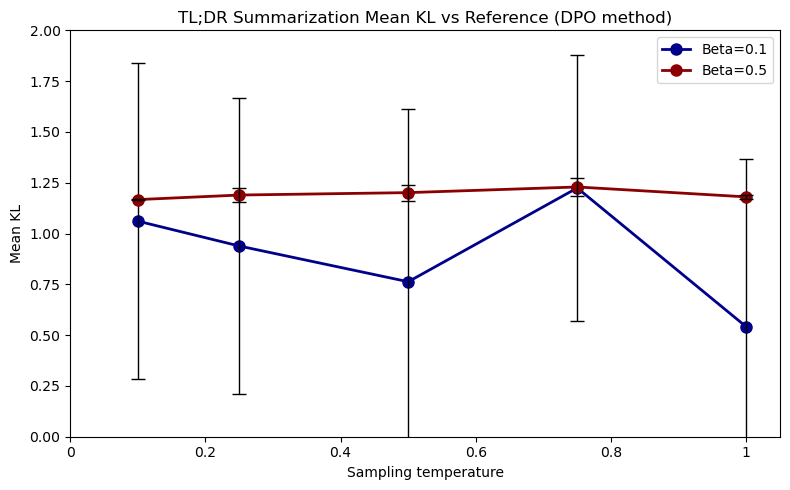

In [87]:
plt.figure(figsize=(8, 5))

for i, beta in enumerate(betas):
    subset = grouped[grouped['Beta'] == beta]
    plt.plot(
        subset["Temperature"],
        subset["mean_kl"],
        marker="o",
        color=colors[i % len(colors)],
        label=f"Beta={beta}",
        linewidth=2,
        markersize=8
    )
    plt.errorbar(
        subset["Temperature"],
        subset["mean_kl"],
        yerr=subset["std_kl"],
        fmt="none",
        ecolor="black",
        capsize=5,
        capthick=1,
        elinewidth=1
    )

#plt.axhline(y=1, color="black", linestyle="--", linewidth=1)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.2g}'))
plt.xlabel("Sampling temperature")
plt.ylabel("Mean KL")
plt.title("TL;DR Summarization Mean KL vs Reference (DPO method)")
plt.ylim(0, 2)
plt.xlim(0, 1.05)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

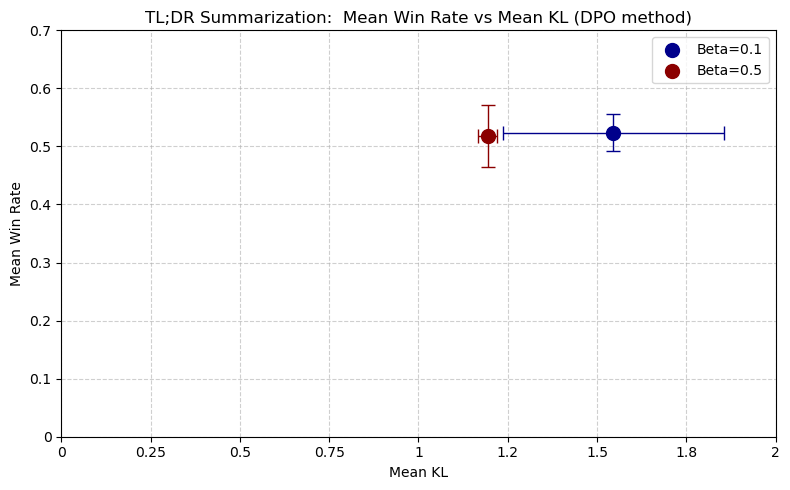

In [88]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

grouped = (
    df_plot[df_plot["Keep"] == "Yes"]
    .groupby(["Temperature", "Beta"])
    .agg(
        mean_win_rate=("Win rate", "mean"),
        std_win_rate=("Win rate", "std"),
        mean_kl=("Avg KL", "mean"),
        std_kl=("Avg KL", "std"),
    )
    .reset_index()
)


betas = grouped['Beta'].unique()
colors = ["darkblue", "darkred", "darkgreen", "darkorange", "darkviolet"]

global_stats = grouped.groupby('Beta').agg(
    mean_kl=('mean_kl', 'mean'),
    std_kl=('std_kl', 'mean'),
    mean_win_rate=('mean_win_rate', 'mean'),
    std_win_rate=('std_win_rate', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))

for i, beta in enumerate(betas):
    subset = global_stats[global_stats['Beta'] == beta]
    plt.scatter(
        subset["mean_kl"],
        subset["mean_win_rate"],
        color=colors[i % len(colors)],
        label=f"Beta={beta}",
        s=100,  # Taille du point
        zorder=3
    )

    plt.errorbar(
        subset["mean_kl"],
        subset["mean_win_rate"],
        xerr=subset["std_kl"],
        fmt="none",
        ecolor=colors[i % len(colors)],
        capsize=5,
        capthick=1,
        elinewidth=1,
        zorder=2
    )

    plt.errorbar(
        subset["mean_kl"],
        subset["mean_win_rate"],
        yerr=subset["std_win_rate"],
        fmt="none",
        ecolor=colors[i % len(colors)],
        capsize=5,
        capthick=1,
        elinewidth=1,
        zorder=2
    )

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.2g}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.2g}'))

plt.xlabel("Mean KL")
plt.ylabel("Mean Win Rate")
plt.title("TL;DR Summarization:  Mean Win Rate vs Mean KL (DPO method)")
plt.ylim(0, 0.7)
plt.xlim(0, 2)
plt.legend(loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
